In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from math import sqrt

import statsmodels.api as sm

In [2]:
file_path = "../input/jpdb-visual-novel-script-statistics/jpdb_vn_stats.csv"
df = pd.read_csv(file_path, delimiter=';')

In [3]:
# Turned out the script sizes found elsewhere in the net are usually in JSIS
df.drop(['Title','Script size (UTF-8)'], axis=1, inplace=True)

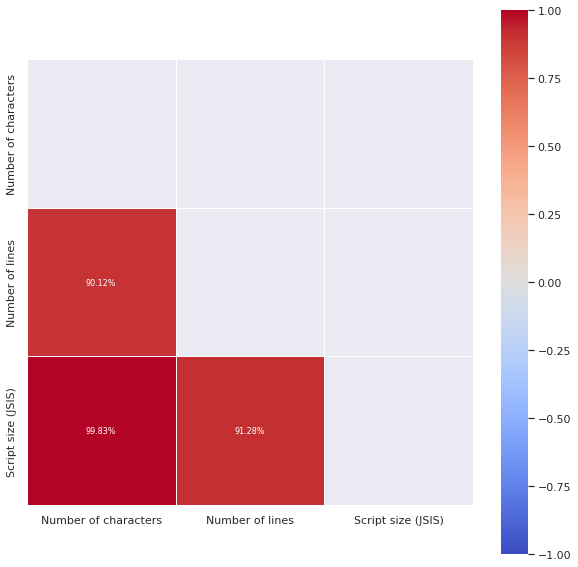

In [4]:
# Very high correlation
corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))

plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr,mask=mask,vmax=1,vmin=-1, center=0,square=True,linewidths=.5,cmap=sns.color_palette("coolwarm", as_cmap=True),annot=True,fmt=".2%",annot_kws={"fontsize":8})

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

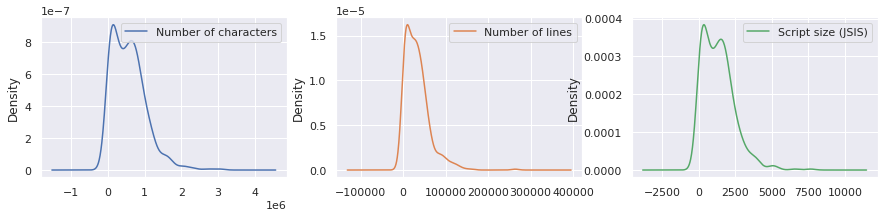

In [5]:
df.plot(kind= 'kde' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,10))

In [6]:
X = df.copy()
y = X['Number of characters']
X.drop(['Number of characters'], axis=1, inplace=True)

In [7]:
# Building and scoring the model
model = LinearRegression()
model.fit(X, y)
preds = model.predict(X)
print(f'The mean absolute error of LinearRegression is {mean_absolute_error(y, preds)}')
print(f'The mean squared error of LinearRegression is {sqrt(mean_squared_error(y, preds))}')
print(f'The R squared score for LinearRegression is {r2_score(y, preds)}')

The mean absolute error of LinearRegression is 16230.589253121454
The mean squared error of LinearRegression is 24143.619815268863
The R squared score for LinearRegression is 0.9972513249985846


In [8]:
# Coefficients
cfs = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
cfs

,Coefficients
Number of lines,-0.941630
Script size (JSIS),443.600433


In [9]:
# Saving the model
import pickle
with open('model', 'wb') as f:
    pickle.dump(model, f)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


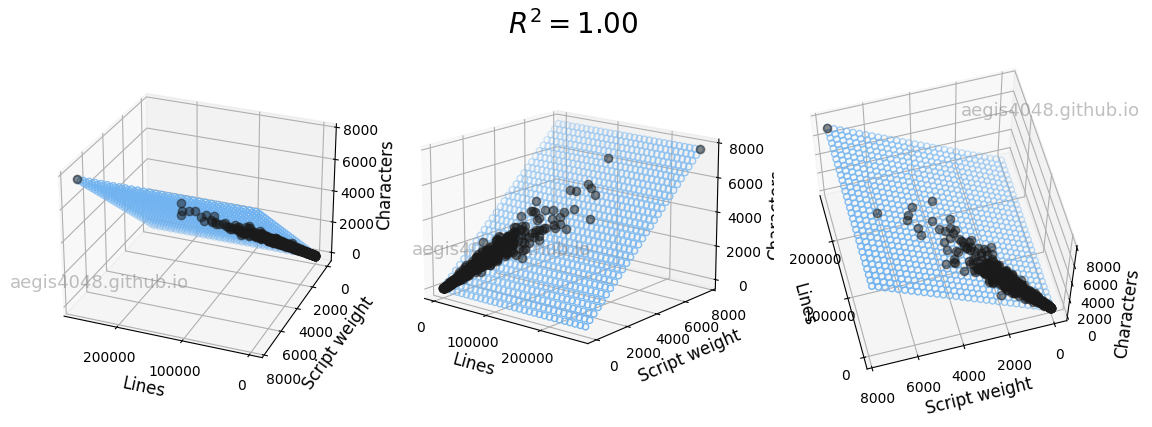

In [10]:
######################## Prepare model data point for visualization ###############################

x = X['Number of lines']
y = X['Script size (JSIS)']
z = y

x_pred = np.linspace(min(x), max(x), 30)      # range of porosity values
y_pred = np.linspace(min(y), max(y), 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = LinearRegression()
model = ols.fit(X, y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Lines', fontsize=12)
    ax.set_ylabel('Script weight', fontsize=12)
    ax.set_zlabel('Characters', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()